# RandomForest Classifier with Spambase


## Import required packages

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import matplotlib.pylab as plt

from dmba import classificationSummary, gainsChart, liftChart

no display found. Using non-interactive Agg backend


Spambase is a dataset used for detecting email spam based on a number of characteristics.

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

### Data Loading and Preprocessing

In [14]:
data_df = pd.read_csv('spambase.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [50]:
data_df.head(10)

make  address   all  W_3d   our  over  remove  internet  order  mail  ...  \
0  0.00     0.64  0.64   0.0  0.32  0.00    0.00      0.00   0.00  0.00  ...   
1  0.21     0.28  0.50   0.0  0.14  0.28    0.21      0.07   0.00  0.94  ...   
2  0.06     0.00  0.71   0.0  1.23  0.19    0.19      0.12   0.64  0.25  ...   
3  0.00     0.00  0.00   0.0  0.63  0.00    0.31      0.63   0.31  0.63  ...   
4  0.00     0.00  0.00   0.0  0.63  0.00    0.31      0.63   0.31  0.63  ...   
5  0.00     0.00  0.00   0.0  1.85  0.00    0.00      1.85   0.00  0.00  ...   
6  0.00     0.00  0.00   0.0  1.92  0.00    0.00      0.00   0.00  0.64  ...   
7  0.00     0.00  0.00   0.0  1.88  0.00    0.00      1.88   0.00  0.00  ...   
8  0.15     0.00  0.46   0.0  0.61  0.00    0.30      0.00   0.92  0.76  ...   
9  0.06     0.12  0.77   0.0  0.19  0.32    0.38      0.00   0.06  0.00  ...   

     C;     C(   C[     C!     C$     C#  CAP_avg  CAP_long  CAP_tot  Spam  
0  0.00  0.000  0.0  0.778  0.000  0.000    3.756        61      278     1  
1  0.00  0.132  0.0  0.372  0.180  0.048    5.114       101     1028     1  
2  0.01  0.143  0.0  0.276  0.184  0.010    9.821       485     2259     1  
3  0.00  0.137  0.0  0.137  0.000  0.000    3.537        40      191     1  
4  0.00  0.135  0.0  0.135  0.000  0.000    3.537        40      191     1  
5  0.00  0.223  0.0  0.000  0.000  0.000    3.000        15       54     1  
6  0.00  0.054  0.0  0.164  0.054  0.000    1.671         4      112     1  
7  0.00  0.206  0.0  0.000  0.000  0.000    2.450        11       49     1  
8  0.00  0.271  0.0  0.181  0.203  0.022    9.744       445     1257     1  
9  0.04  0.030  0.0  0.244  0.081  0.000    1.729        43      749     1  

[10 rows x 58 columns]

In [15]:
data_df.describe()

make      address          all         W_3d          our  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.104553     0.213015     0.280656     0.065425     0.312223   
std       0.305358     1.290575     0.504143     1.395151     0.672513   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.420000     0.000000     0.380000   
max       4.540000    14.280000     5.100000    42.810000    10.000000   

              over       remove     internet        order         mail  ...  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000  ...   
mean      0.095901     0.114208     0.105295     0.090067     0.239413  ...   
std       0.273824     0.391441     0.401071     0.278616     0.644755  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.160000  ...   
max       5.880000     7.270000    11.110000     5.260000    18.180000  ...   

                C;           C(           C[           C!           C$  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.038575     0.139030     0.016976     0.269071     0.075811   
std       0.243471     0.270355     0.109394     0.815672     0.245882   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.065000     0.000000     0.000000     0.000000   
75%       0.000000     0.188000     0.000000     0.315000     0.052000   
max       4.385000     9.752000     4.081000    32.478000     6.003000   

                C#      CAP_avg     CAP_long       CAP_tot         Spam  
count  4601.000000  4601.000000  4601.000000   4601.000000  4601.000000  
mean      0.044238     5.191515    52.172789    283.289285     0.394045  
std       0.429342    31.729449   194.891310    606.347851     0.488698  
min       0.000000     1.000000     1.000000      1.000000     0.000000  
25%       0.000000     1.588000     6.000000     35.000000     0.000000  
50%       0.000000     2.276000    15.000000     95.000000     0.000000  
75%       0.000000     3.706000    43.000000    266.000000     1.000000  
max      19.829000  1102.500000  9989.000000  15841.000000     1.000000  

[8 rows x 58 columns]

In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        4601 non-null   float64
 1   address     4601 non-null   float64
 2   all         4601 non-null   float64
 3   W_3d        4601 non-null   float64
 4   our         4601 non-null   float64
 5   over        4601 non-null   float64
 6   remove      4601 non-null   float64
 7   internet    4601 non-null   float64
 8   order       4601 non-null   float64
 9   mail        4601 non-null   float64
 10  receive     4601 non-null   float64
 11  will        4601 non-null   float64
 12  people      4601 non-null   float64
 13  report      4601 non-null   float64
 14  addresses   4601 non-null   float64
 15  free        4601 non-null   float64
 16  business    4601 non-null   float64
 17  email       4601 non-null   float64
 18  you         4601 non-null   float64
 19  credit      4601 non-null  

Shape of your Data Set: (4601, 58)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  55
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    57 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification VISUALIZATION Started #####################
Number of variables = 57 exceeds limit, finding top 30 variables through XGBoost
    No categorical feature reduction done. All 2 Categorical vars sel

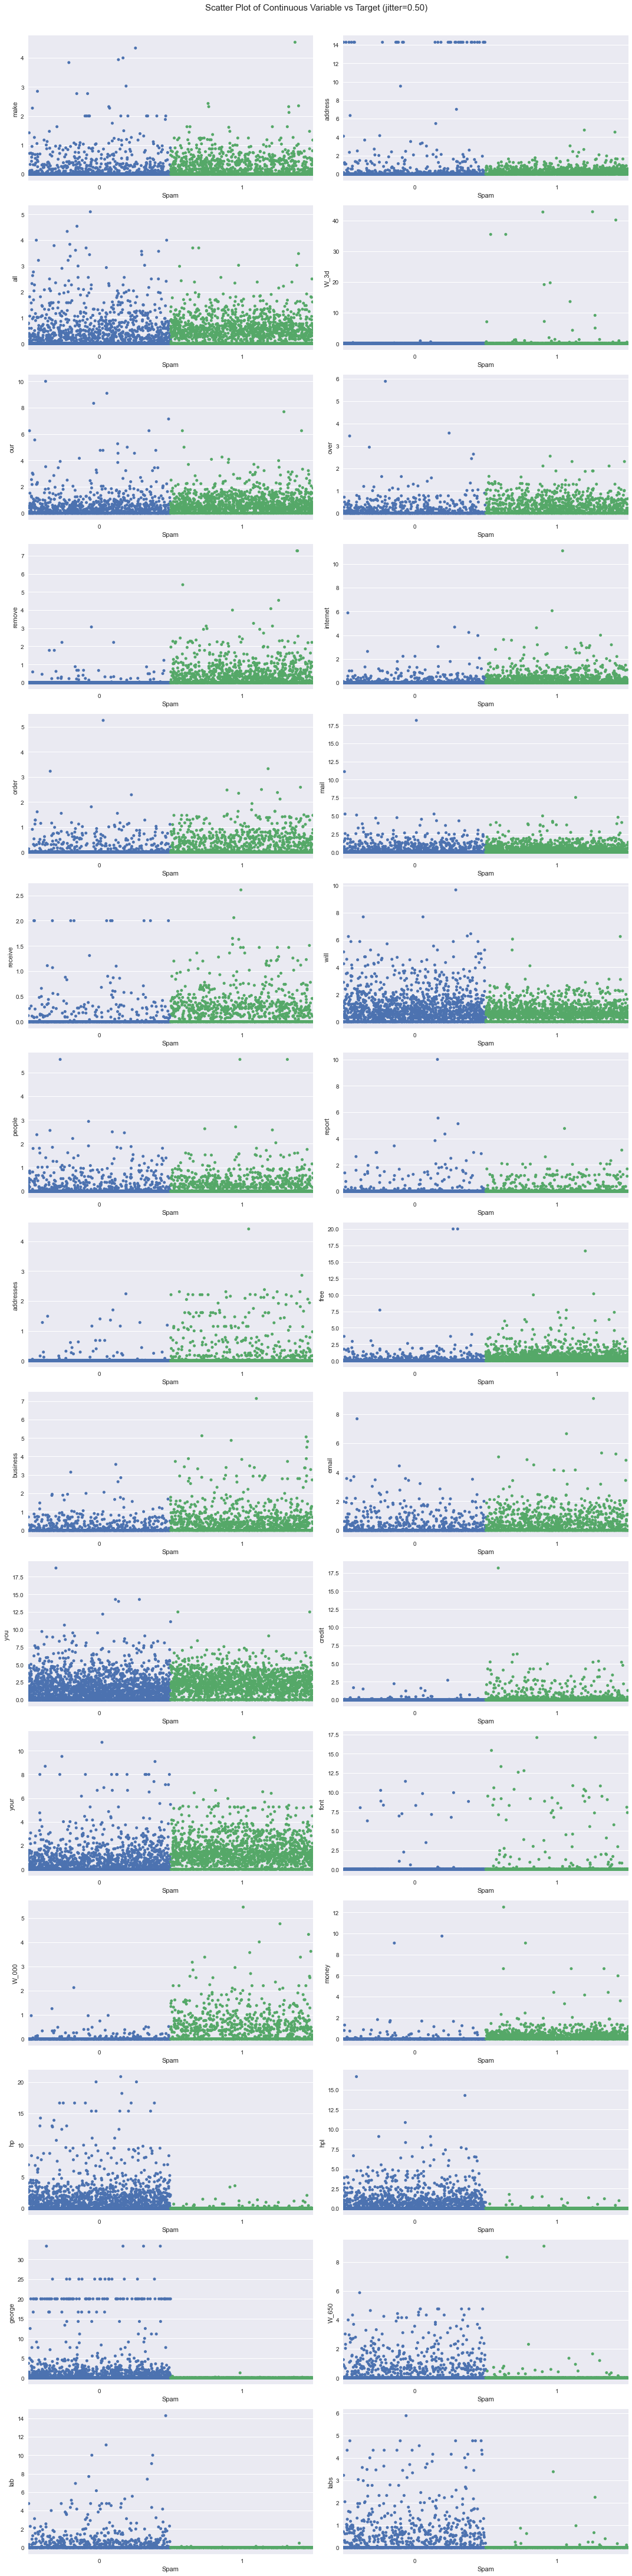

Total Number of Scatter Plots = 465


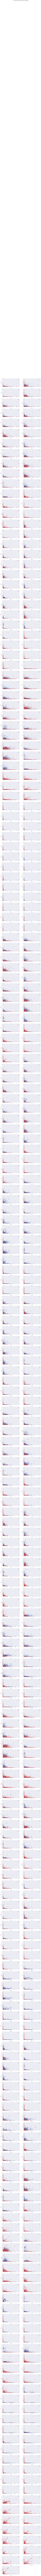

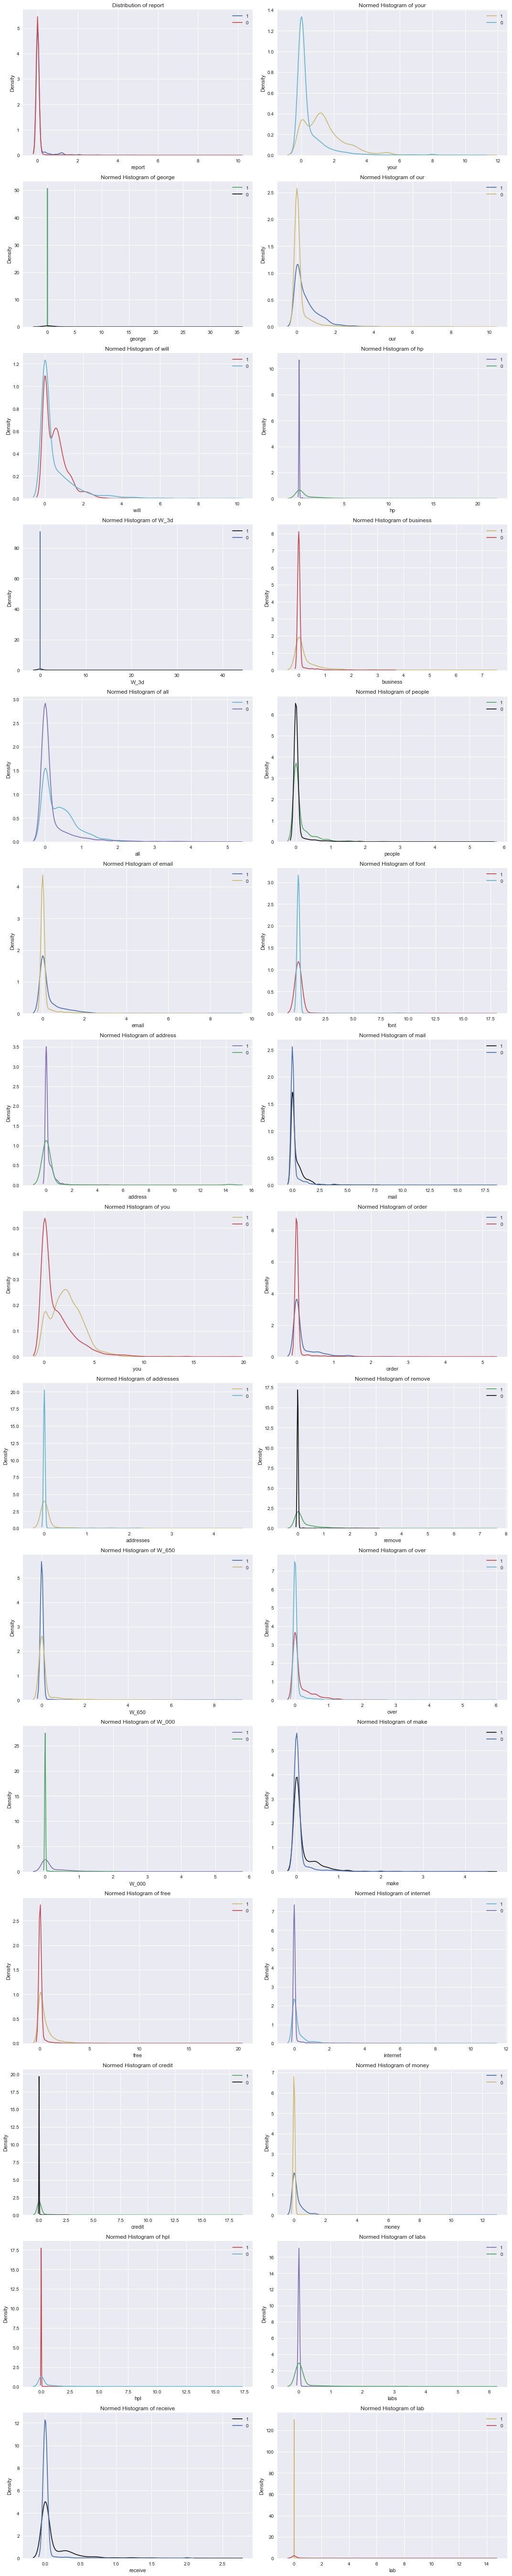

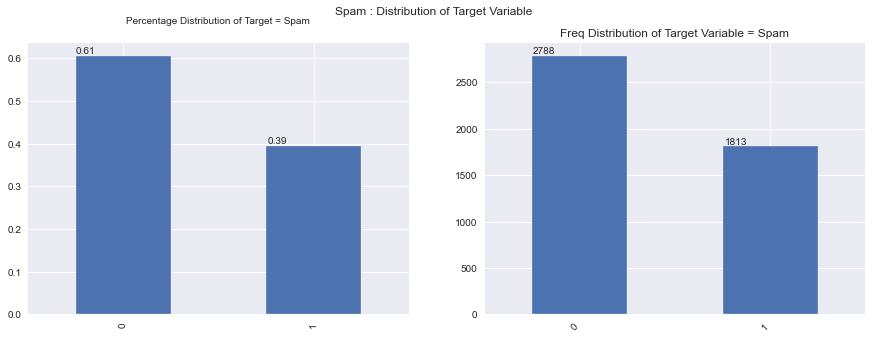

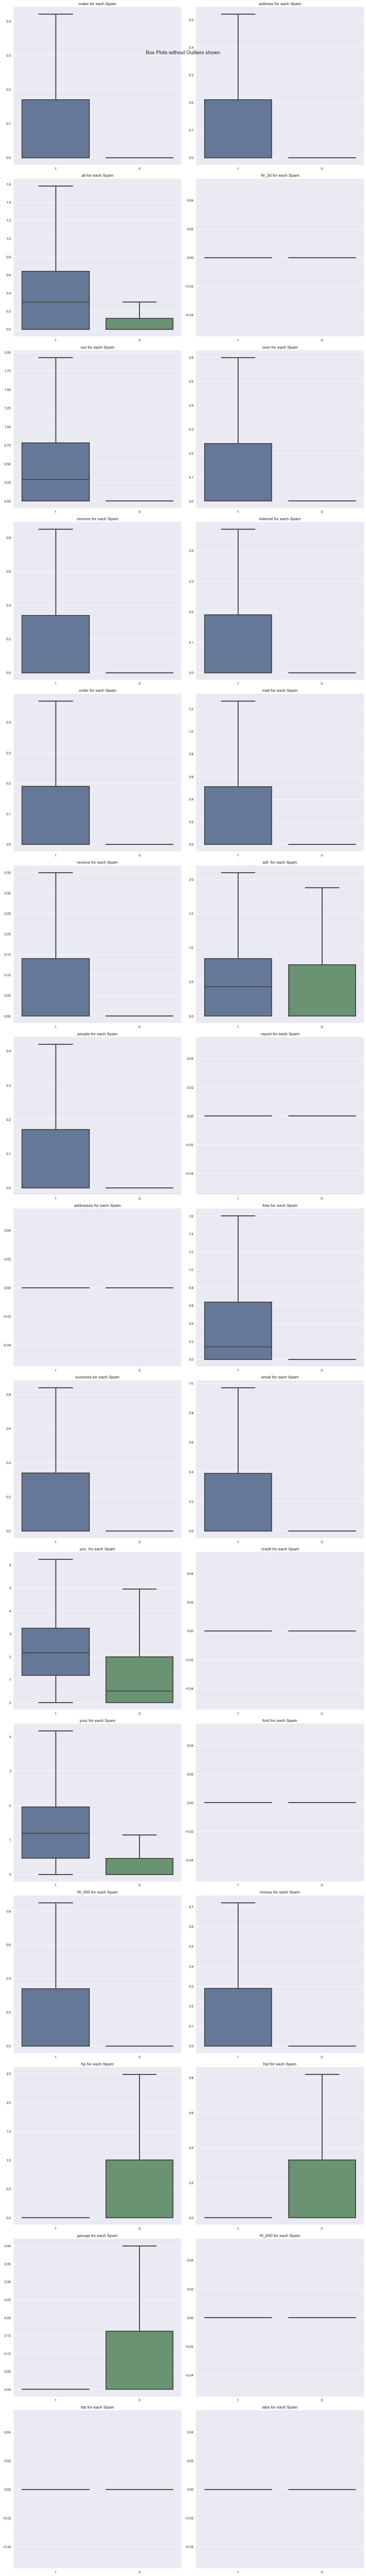

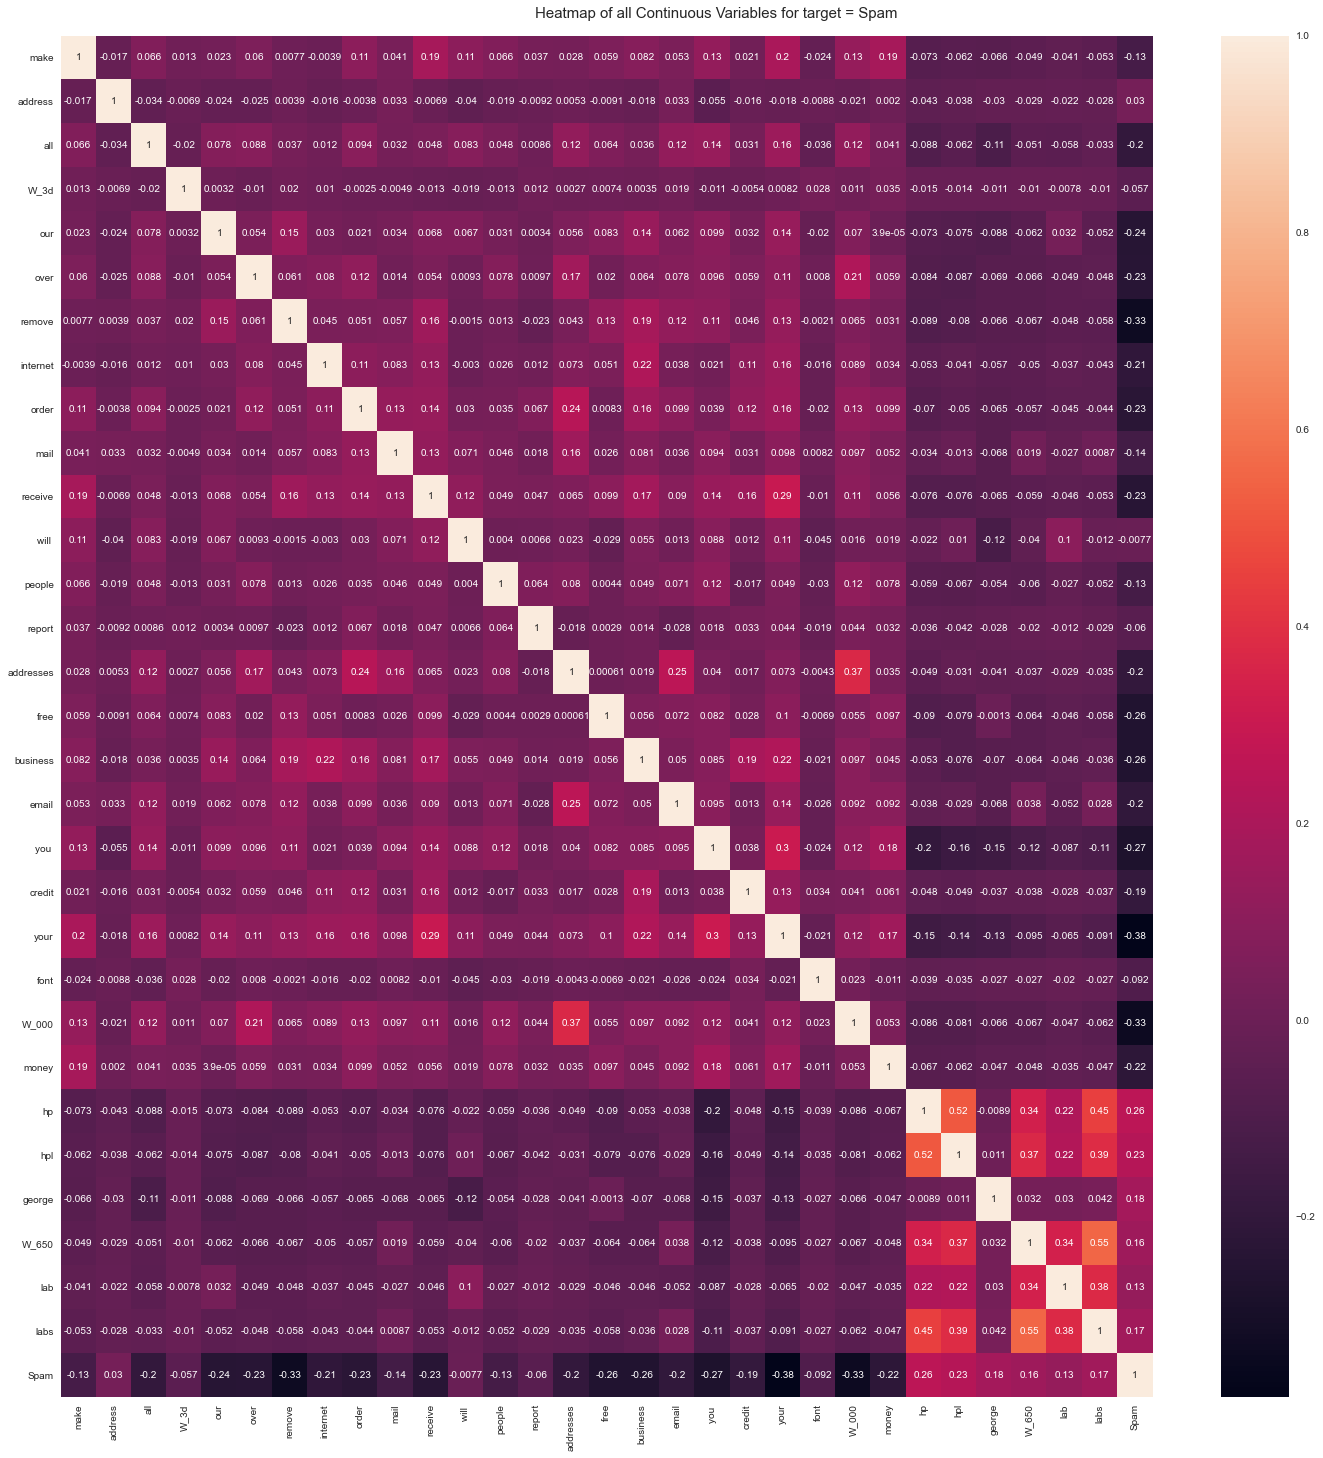

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 92.543

 ###################### VISUALIZATION Completed ########################


In [17]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

filename = ""
separator = ","

dft = AV.AutoViz(
    filename,
    sep = separator,
    depVar="Spam",
    dfte = data_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

In [18]:
# Create a y response variable and an X collection of predictors

y = data_df['Spam']
X = data_df.drop(columns=['Spam'])

In [19]:
# Convert the text of Gone to a binary numeric variable (0/1)
y = y.astype('category').cat.codes

y.value_counts()

0    2788
1    1813
dtype: int64

In [20]:
# Split the data into training and test sets (holdout approach)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, stratify=y, random_state=1)

### Use RandomForest with GridSearch

In [25]:
# user grid search to find optimized tree
param_grid = {
    'n_estimators': [300, 500, 700], 
    'criterion' : ['gini'],
    'oob_score': ['True'],
    'min_impurity_decrease': [0, 0.001, 0.01, 0.1], 
    'min_samples_split': [4, 10, 20], 
    'max_depth':[10, 20, 30],
}

In [26]:
gridSearch = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, n_jobs=6)

gridSearch.fit(train_X, train_y)

print('Initial parameters: ', gridSearch.best_params_)

rfTree = gridSearch.best_estimator_

Initial parameters:  {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0, 'min_samples_split': 4, 'n_estimators': 700, 'oob_score': 'True'}


In [27]:
print(rfTree.oob_score_)

0.95


In [28]:
# we are only interested in classification accuracy

classificationSummary(train_y, rfTree.predict(train_X))

classificationSummary(test_y, rfTree.predict(test_X))

Confusion Matrix (Accuracy 0.9970)

       Prediction
Actual    0    1
     0 1393    1
     1    6  900
Confusion Matrix (Accuracy 0.9457)

       Prediction
Actual    0    1
     0 1352   42
     1   83  824


In [29]:
classes = rfTree.predict(test_X)

print(metrics.classification_report(test_y, classes))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1394
           1       0.95      0.91      0.93       907

    accuracy                           0.95      2301
   macro avg       0.95      0.94      0.94      2301
weighted avg       0.95      0.95      0.95      2301



#### Refine the hyperparameter values to improve the model performance.

In [42]:
param_grid = {
    'n_estimators': [700, 800, 900], 
    'criterion' : ['gini'],
    'oob_score': ['True'],
    'min_impurity_decrease': [0.0001, 0.001], 
    'min_samples_split': [3], 
    'max_depth':[30, 40, 50],
}

In [43]:
gridSearch = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, n_jobs=6)

gridSearch.fit(train_X, train_y)

print('Initial parameters: ', gridSearch.best_params_)

rfTree = gridSearch.best_estimator_

Initial parameters:  {'criterion': 'gini', 'max_depth': 40, 'min_impurity_decrease': 0.0001, 'min_samples_split': 3, 'n_estimators': 800, 'oob_score': 'True'}


In [44]:
print(rfTree.oob_score_)

0.9478260869565217


In [45]:
# we are only interested in classification accuracy

classificationSummary(train_y, rfTree.predict(train_X))

classificationSummary(test_y, rfTree.predict(test_X))

Confusion Matrix (Accuracy 0.9865)

       Prediction
Actual    0    1
     0 1388    6
     1   25  881
Confusion Matrix (Accuracy 0.9392)

       Prediction
Actual    0    1
     0 1350   44
     1   96  811


In [46]:
classes = rfTree.predict(test_X)

print(metrics.classification_report(test_y, classes))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1394
           1       0.95      0.89      0.92       907

    accuracy                           0.94      2301
   macro avg       0.94      0.93      0.94      2301
weighted avg       0.94      0.94      0.94      2301



#### Create and display lift and gain charts (check model performance)

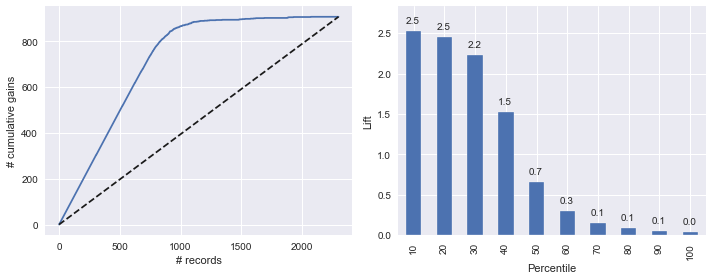

In [47]:
%matplotlib inline

rfTree_pred = rfTree.predict(test_X)
rfTree_proba = rfTree.predict_proba(test_X)

rfTree_result = pd.DataFrame({'actual': test_y, 
                             'p(0)': [p[0] for p in rfTree_proba],
                             'p(1)': [p[1] for p in rfTree_proba],
                             'predicted': rfTree_pred })

df = rfTree_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

#### Create and display the ROC chart (check model performance using Positive predictive accuracy)

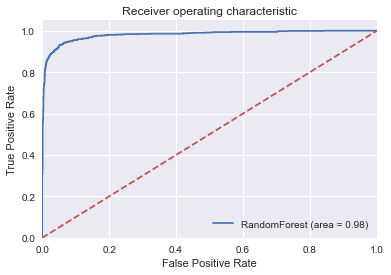

In [48]:
rfTree_pred = rfTree.predict(test_X)
rfTree_proba = rfTree.predict_proba(test_X)

preds = rfTree_proba[:,1]

fpr, tpr, threshold = metrics.roc_curve(test_y, preds)

roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFTree_ROC')
plt.show()

#### Create and display the feature importances (identifies the predictors that were responsible for the largest reduction in impurity)

       feature  importance       std
52          C$    0.110916  0.120256
51          C!    0.107764  0.096156
6       remove    0.090012  0.094023
54     CAP_avg    0.067737  0.066245
15        free    0.064963  0.071861
55    CAP_long    0.059741  0.069378
20        your    0.048786  0.069640
56     CAP_tot    0.045338  0.053885
24          hp    0.043862  0.047883
23       money    0.038997  0.064994
4          our    0.030540  0.041056
22       W_000    0.026342  0.043842
18        you     0.024776  0.027018
25         hpl    0.021395  0.033768
26      george    0.019962  0.025286
45         edu    0.015745  0.014195
7     internet    0.015000  0.025181
16    business    0.014999  0.027154
36      W_1999    0.011167  0.018038
11       will     0.009870  0.007642
2          all    0.009791  0.019405
49          C(    0.009534  0.006505
10     receive    0.008404  0.018313
17       email    0.008295  0.011652
5         over    0.007714  0.014558
9         mail    0.007207  0.010345
4

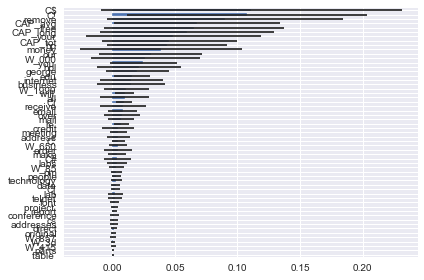

In [49]:
%matplotlib inline
import numpy as np

importances = rfTree.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfTree.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df1 = df.sort_values('importance', ascending=False)
print(df1)

df = df.sort_values('importance', ascending=True)
ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()